In [41]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from sklearn.cluster import Birch, DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

In [2]:
df = pd.read_csv("hit_data.csv")

In [3]:
# plt.ioff()

In [4]:
df.drop(df.columns[[7, 21,22,23,24,25]],axis=1, inplace=True)
# df.columns[[7, 21,22,23,24,25]]

In [5]:
df

,ID,Time (s),CH,RISE,COUN,ENER,DURATION,A-FRQ,ASL,PCNTS,THR,R-FRQ,I-FRQ,SIG STRNGTH,Cumulative Energy,P-FRQ,Hit Count,AMP,ABS-ENERGY,FRQ-C
0,1,0.050333,1,0,1,0,6,167,22,1,35,0,1000,207.0,1.12,200,1,36,1,657
1,1,0.053295,1,0,1,0,0,0,22,1,35,0,1000,0.0,1.12,4,2,35,0,618
2,1,3.730839,1,0,2,0,21,95,23,1,35,50,1000,540.0,3.15,43,3,36,2,569
3,1,5.699318,1,0,1,0,0,0,23,1,35,0,1000,21.4,3.28,200,4,35,0,643
4,1,7.776408,1,6,2,0,13,154,22,1,35,166,166,454.0,5.34,141,5,36,2,603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6940,1,6121.998183,1,127,2,0,127,16,23,2,35,0,15,2310.0,271000.00,39,6941,35,8,624
6941,1,6122.836514,1,0,1,0,0,0,23,1,35,0,1000,0.0,271000.00,34,6942,35,0,713
6942,1,6122.935455,1,0,1,0,0,0,23,1,35,0,1000,0.0,271000.00,53,6943,35,0,671
6943,1,6125.220805,1,0,1,0,0,0,23,1,35,0,1000,6.1,271000.00,4,6944,35,0,594


In [6]:
def scatter_from_colname(xname, yname, df):
    xdata = df[xname].to_numpy()
    ydata = df[yname].to_numpy()
    fig, ax = plt.subplots(1)
    ax.scatter(xdata, ydata, s=0.5)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
#     plt.savefig("./cluster_plots/" + yname + "_vs_" + xname + ".png")

def scatter_3d(xname, yname,zname, df):
    fig = plt.figure()
    fig.set_size_inches(10,6)
    ax = fig.add_subplot(111, projection='3d')
    xdata = df[xname].to_numpy()
    ydata = df[yname].to_numpy()
    zdata = df[zname].to_numpy()
    ax.scatter(xdata, ydata, zdata, s=0.6)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    ax.set_zlabel(zname)
#     plt.savefig("./3d_cluster/" + yname + "_vs_" + xname + "vs" + zname + ".png", dpi=200)
    
def density_plot(xname, yname, df):
    xdata = df[xname].to_numpy()
    ydata = df[yname].to_numpy()
    fig, ax = plt.subplots(1)
    ax.hist2d(xdata, ydata, (150, 150), cmap=plt.cm.jet, norm=LogNorm())
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)

In [7]:
# scatter_3d("P-FRQ", "FRQ-C","Hit Count", df)

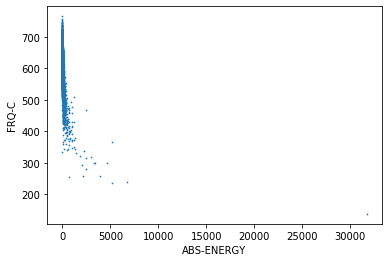

In [8]:
scatter_from_colname("ABS-ENERGY", "FRQ-C",df)

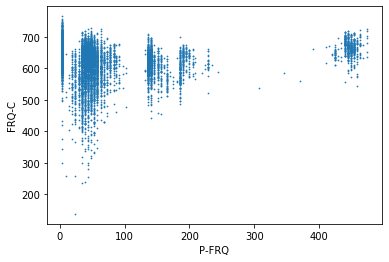

In [9]:
scatter_from_colname("P-FRQ", "FRQ-C",df)

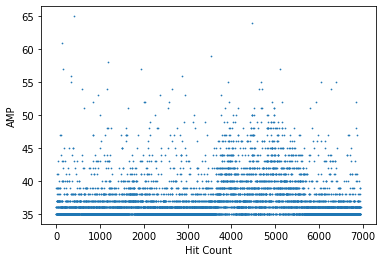

In [10]:
scatter_from_colname("Hit Count", "AMP", df)

In [11]:
names = df.columns.drop(["ID", "CH", "THR","PCNTS", "COUN"])
print(names)
count = 0
dropped_names_1 = []
dropped_names_2 = []
for c1 in names:
    for c2 in names.drop(dropped_names_1):
        for c3 in names.drop(dropped_names_1):
            count+= 1
#             scatter_3d(c1, c2, c3, df)
#             print(c1, c2, c3)
            dropped_names_2.append(c2)
        dropped_names_1.append(c1)
print(count)

Index(['Time (s)', 'RISE', 'ENER', 'DURATION', 'A-FRQ', 'ASL', 'R-FRQ',
       'I-FRQ', 'SIG STRNGTH', 'Cumulative Energy', 'P-FRQ', 'Hit Count',
       'AMP', 'ABS-ENERGY', 'FRQ-C'],
      dtype='object')
1135


In [12]:
len(df.columns.drop(["ID", "CH", "THR","PCNTS", "COUN"]))

15

In [13]:
names = df.columns.drop(["ID", "CH", "THR"])
count = 0
dropped_names = []
for c1 in names:
    for c2 in names.drop(dropped_names):
        count+= 1
#         print(c1, c2)
#         dropped_names.append(c1)
#         scatter_from_colname(c1, c2, df)
# print(count)

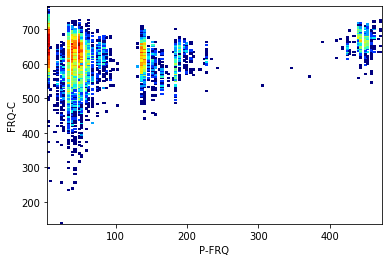

In [14]:
# Calculate the point density
# xy = np.vstack([p_frq,frq_c])
# z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
# idx = z.argsort()
# x, y, z = p_frq[idx], frq_c[idx], z[idx]
density_plot("P-FRQ", "FRQ-C", df)


### Now Running Clustering on the Data 

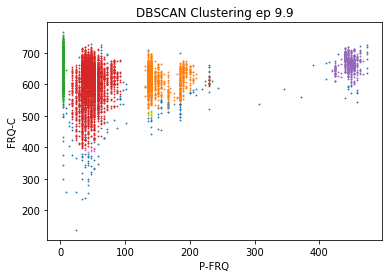

In [64]:
fig, ax = plt.subplots(1)
model = Birch(threshold=0.001, n_clusters=3)
# fit the model
xdata = df["P-FRQ"].to_numpy()
ydata = df["FRQ-C"].to_numpy()
X = np.column_stack((xdata, ydata))
epsilon = 9.9
model = DBSCAN(eps=epsilon, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	ax.scatter(X[row_ix, 0], X[row_ix, 1], s=0.7)

ax.set_xlabel("P-FRQ")
ax.set_ylabel("FRQ-C")
ax.set_title(f"DBSCAN Clustering ep {epsilon}")
# show the plot
plt.show()